In [1]:
from ecell4 import *
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

phio = 0.9069/6#int(sys.argv[1]) 
run = 1#int(sys.argv[2]) 

print 'run',run
L = 1.
rm = 0.005
rv = rm#*1.5384
At = L*L
Ap = math.pi*rm*rm
Do = 0
Dt = 1
phit = 0.01
H = 3*rv*2
dt = (2*rv)**2 / (4*Dt)
print 'L={},rm={},Do={},Dt={},dt={}'.format(L,rm,Do,Dt,dt)
ori = Real3(0.5*H,0,0)
unit0 = Real3(0,0,L)
unit1 = Real3(0,L,0)
w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),rv)
lx,ly,lz = tuple(w.actual_lengths())
print 'lx,ly,lz',lx,ly,lz
cs = w.row_size()
ls = w.layer_size()
Nmv = cs*ls
#Nt = int(phit*Nmv)
Nt = int(phit*At/Ap)
#No = int(phio*Nmv)
No = int(phio*At/Ap)
phir = No*np.pi*rm*rm/ly/lz
print 'real phi',phir
print 'no of membrane voxels',cs,'x',ls,'=',Nmv
print 'occupancy of tracer',float(Nt)/Nmv,'occupancy of obstacles',float(No)/Nmv
print 'Nt',Nt,'No',No
tt = np.logspace(math.log10(2.1*dt),1,15)
tt = np.insert(tt,0,dt)
tt = np.insert(tt,0,0.)
dur = tt[-1]

def singlerun(rr):
    msd = np.zeros(len(tt),float)
    #print 'run',rr
    rng.seed(rr)
    w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),rv,rng)
    x,y,z = w.actual_lengths()
    with species_attributes():
        O | {'D':str(Do),'radius':str(rv),'location':'M'}
        T | {'D':str(Dt),'radius':str(rv),'location':'M'}
    m=get_model()
    w.bind_to(m)
    w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
    w.add_molecules(Species('O'),No)
    w.add_molecules(Species('T'),Nt)
    sim = spatiocyte.SpatiocyteSimulator(w)
    pids = [pid for pid, p in w.list_particles(Species("T"))] #particle IDs
    #obs = FixedIntervalTrajectoryObserver(dt,pids)
    obs = TimingTrajectoryObserver(tt,pids,True,dt)
    sim.run(dur,obs)
    data=obs.data()
    for i in range(Nt):
        msd += np.array(
            [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
                 for pos in data[i]]) 
    #viz.plot_trajectory(obs)    
    return msd/Nt

msd = singlerun(run)

#name = 'data/2Dcrowding_LS_phi'+str(phio)+'run'+str(run)+'.csv'
#filename = open(name,'w')
#np.savetxt(filename,np.column_stack((t,msd)),delimiter=',',fmt='%s')
#filename.close()
#print 'saving to ',name




run 1
L=1.0,rm=0.005,Do=0,Dt=1,dt=2.5e-05
lx,ly,lz 0.0489897948557 1.00458946839 1.02
real phi 0.147470840804
no of membrane voxels 102 x 116 = 11832
occupancy of tracer 0.0107336037863 occupancy of obstacles 0.162609871535
Nt 127 No 1924


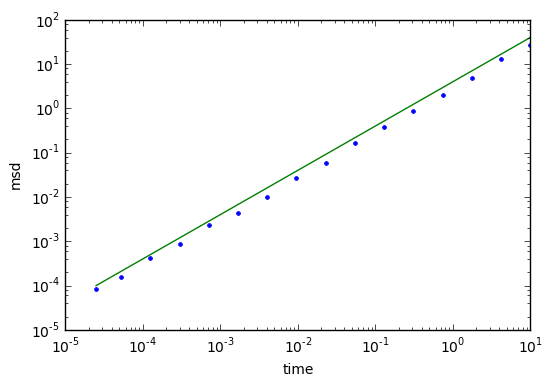

In [2]:
plt.loglog(tt,msd,'.')
plt.plot(tt,4*Dt*tt,'g-')  #theoretical line
plt.xlabel("time")
plt.ylabel("msd")
plt.show()
print 

0.699535072575


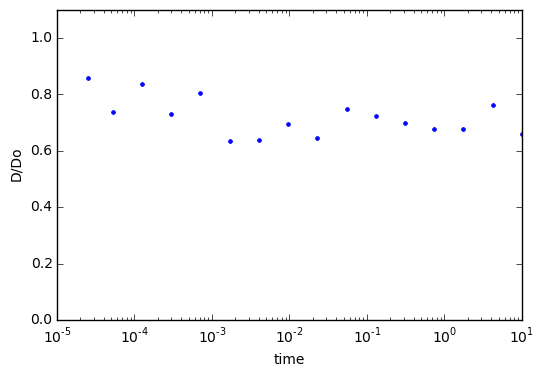

In [3]:
Deff = msd[1:]/tt[1:]/4/Dt
plt.semilogx(tt[1:],Deff,'.')
plt.xlabel("time")
plt.ylabel("D/Do")
plt.ylim(0,1.1)
#filename = open('data/2Dcrowding_LS_phi'+str(phio)+'.csv','w')
#np.savetxt(filename,np.column_stack((msd,t)),delimiter=',',fmt='%s')
#filename.close()
print np.mean(Deff[(tt>1e-1)[1::]])

In [4]:
0.0  , 0.97
0.05 , 0.82
0.1  , 0.66
0.15 , 0.54
0.2  , 0.43
0.25 , 0.28
0.3  , 0.22
0.35 , 0.14
0.4  , 0.08
0.45 , 0.02

(0.45, 0.02)